In [39]:
import pandas as pd
vyroba = pd.read_csv('Excel_test_dlouhy.csv', sep = ';')
vyroba

,ID_produktu,ID_zavodu,Datum,Mnozstvi
0,ND102,ZP30,3.3.2017,25
1,ND123,ZP10,14.5.2018,16
2,ND112,ZP30,10.2.2017,29
3,ND118,ZP20,8.8.2018,1
4,ND119,ZP20,14.1.2018,16
...,...,...,...,...
2153,ND105,ZP20,21.1.2017,23
2154,ND115,ZP10,9.6.2017,30
2155,ND123,ZP30,28.1.2018,1
2156,ND124,ZP30,17.4.2018,11


# Příprava dat

In [46]:
vyroba['Datum']=pd.to_datetime(vyroba['Datum'])
posledni_rok=vyroba.loc[(vyroba['Datum']>='2018-01-01')]
posledni_rok['Datum']=posledni_rok['Datum'].astype(str)
def mesic(date):
    return date.split('-')[1]
posledni_rok['mesic']=posledni_rok['Datum'].apply(lambda x:mesic(x))
posledni_rok

<ipython-input-46-fdac894316b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posledni_rok['Datum']=posledni_rok['Datum'].astype(str)
<ipython-input-46-fdac894316b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posledni_rok['mesic']=posledni_rok['Datum'].apply(lambda x:mesic(x))


,ID_produktu,ID_zavodu,Datum,Mnozstvi,mesic
1,ND123,ZP10,2018-05-14,16,05
3,ND118,ZP20,2018-08-08,1,08
4,ND119,ZP20,2018-01-14,16,01
9,ND120,ZP10,2018-07-13,26,07
10,ND107,ZP10,2018-11-06,28,11
...,...,...,...,...,...
2149,ND120,ZP20,2018-05-01,2,05
2150,ND118,ZP20,2018-04-01,7,04
2152,ND104,ZP30,2018-07-02,19,07
2155,ND123,ZP30,2018-01-28,1,01


In [82]:
plzen=posledni_rok.loc[posledni_rok['ID_zavodu']=='ZP10']
prerov=posledni_rok.loc[posledni_rok['ID_zavodu']=='ZP20']
ostrava=posledni_rok.loc[posledni_rok['ID_zavodu']=='ZP30']
plzen.sort_values(['mesic']).head(40)
plzen.name='Plzeň'
prerov.name='Přerov'
ostrava.name='Ostrava'

'Přerov'

# Graf

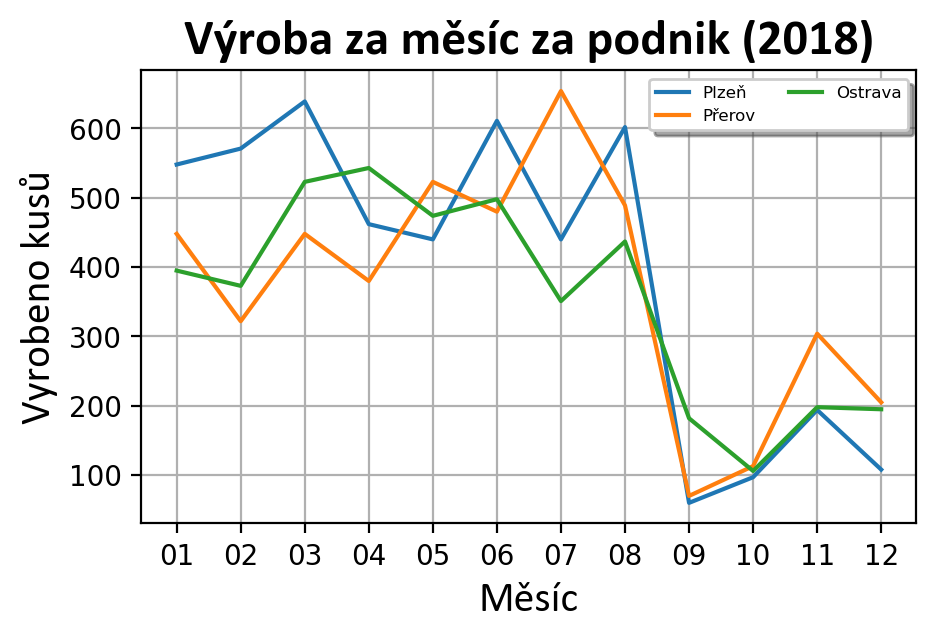

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3),dpi=200)

mesice=['01','02','03','04','05','06','07','08','09','10','11','12']
zavody=[plzen,prerov,ostrava]
data=[]
for zavod in zavody:
    for mesic in mesice:
        data.append(zavod.loc[zavod['mesic']==mesic].sum()['Mnozstvi'])
    plt.plot(mesice,data,label=zavod.name)
    data=[]
    
plt.title('Výroba za měsíc za podnik (2018)',fontdict={'fontname':'Calibri','fontsize':18,'weight':'bold'})
plt.xlabel('Měsíc',fontdict={'fontname':'Calibri','fontsize':15})
plt.ylabel('Vyrobeno kusů',fontdict={'fontname':'Calibri','fontsize':15})
plt.legend(loc='upper right',fontsize=6,ncol=2,fancybox=True,shadow=True)
plt.grid()
plt.show()